# ML без преподготовки данных.

In [ ]:
! unzip /content/ssz_data_manual.zip

Archive:  /content/ssz_data_manual.zip
   creating: ssz_data/
  inflating: ssz_data/test.csv       
  inflating: ssz_data/train.csv      


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv('/content/ssz_data/train.csv')
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,58036,18387,2,175,75.0,110,70,1,1,0,0,1,1
1,88981,23328,2,155,66.0,140,90,1,1,1,1,0,0
2,74325,17602,2,168,73.0,120,80,2,1,0,0,1,0
3,16519,23432,2,183,95.0,140,90,1,1,0,0,0,1
4,28981,23162,1,156,62.0,150,80,1,1,0,0,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58000 entries, 0 to 57999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           58000 non-null  int64  
 1   age          58000 non-null  int64  
 2   gender       58000 non-null  int64  
 3   height       58000 non-null  int64  
 4   weight       58000 non-null  float64
 5   ap_hi        58000 non-null  int64  
 6   ap_lo        58000 non-null  int64  
 7   cholesterol  58000 non-null  int64  
 8   gluc         58000 non-null  int64  
 9   smoke        58000 non-null  int64  
 10  alco         58000 non-null  int64  
 11  active       58000 non-null  int64  
 12  cardio       58000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.8 MB


In [ ]:
test = pd.read_csv('/content/ssz_data/test.csv')

In [ ]:
test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,36043,17646,2,165,65.0,120,80,1,1,0,0,0,1
1,44455,20418,1,161,77.0,120,70,1,1,0,0,1,1
2,61323,20347,1,165,88.0,120,80,2,2,0,0,1,1
3,27780,18086,2,170,91.0,120,80,3,3,0,0,1,1
4,54273,21791,1,158,67.0,130,80,1,1,0,0,1,1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           12000 non-null  int64  
 1   age          12000 non-null  int64  
 2   gender       12000 non-null  int64  
 3   height       12000 non-null  int64  
 4   weight       12000 non-null  float64
 5   ap_hi        12000 non-null  int64  
 6   ap_lo        12000 non-null  int64  
 7   cholesterol  12000 non-null  int64  
 8   gluc         12000 non-null  int64  
 9   smoke        12000 non-null  int64  
 10  alco         12000 non-null  int64  
 11  active       12000 non-null  int64  
 12  cardio       12000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.2 MB


In [ ]:
y_train = train.cardio
y_train.head()

,cardio
0,1
1,0
2,0
3,1
4,1


In [ ]:
x_train = train.drop('cardio', axis=1)

In [ ]:
x_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,58036,18387,2,175,75.0,110,70,1,1,0,0,1
1,88981,23328,2,155,66.0,140,90,1,1,1,1,0
2,74325,17602,2,168,73.0,120,80,2,1,0,0,1
3,16519,23432,2,183,95.0,140,90,1,1,0,0,0
4,28981,23162,1,156,62.0,150,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57995,11538,14567,1,158,58.0,130,100,1,1,0,0,1
57996,82940,19838,1,165,59.0,120,80,3,3,0,0,0
57997,26556,20464,1,165,65.0,120,79,2,2,0,0,0
57998,62265,23375,2,164,79.0,150,70,2,3,0,0,1


In [ ]:
y_test = test.cardio

In [ ]:
y_test.head()

,cardio
0,1
1,1
2,1
3,1
4,1


In [ ]:
x_test = test.drop('cardio', axis=1)

In [ ]:
x_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,36043,17646,2,165,65.0,120,80,1,1,0,0,0
1,44455,20418,1,161,77.0,120,70,1,1,0,0,1
2,61323,20347,1,165,88.0,120,80,2,2,0,0,1
3,27780,18086,2,170,91.0,120,80,3,3,0,0,1
4,54273,21791,1,158,67.0,130,80,1,1,0,0,1


In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_predicted = lr.predict(x_test)

In [ ]:
lr_predicted[:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [ ]:
rf_predicted = rf.predict(x_test)

In [ ]:
rf_predicted[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
np.array(y_test[:10])

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
accuracy_score(lr_predicted, y_test)

0.6923333333333334

In [ ]:
accuracy_score(rf_predicted, y_test)

0.7309166666666667

In [ ]:
f1_score(lr_predicted, y_test), f1_score(rf_predicted, y_test)

(0.6837416481069042, 0.7190463760549899)

# ML с преподготовкой данных

In [ ]:
df = pd.read_csv('/content/melb_data.csv.zip')

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.shape

(13580, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Разделение на фичи и результат

In [ ]:
y = df.Price

In [ ]:
x=df.drop('Price', axis=1)

## Разделение на train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>]], dtype=object)

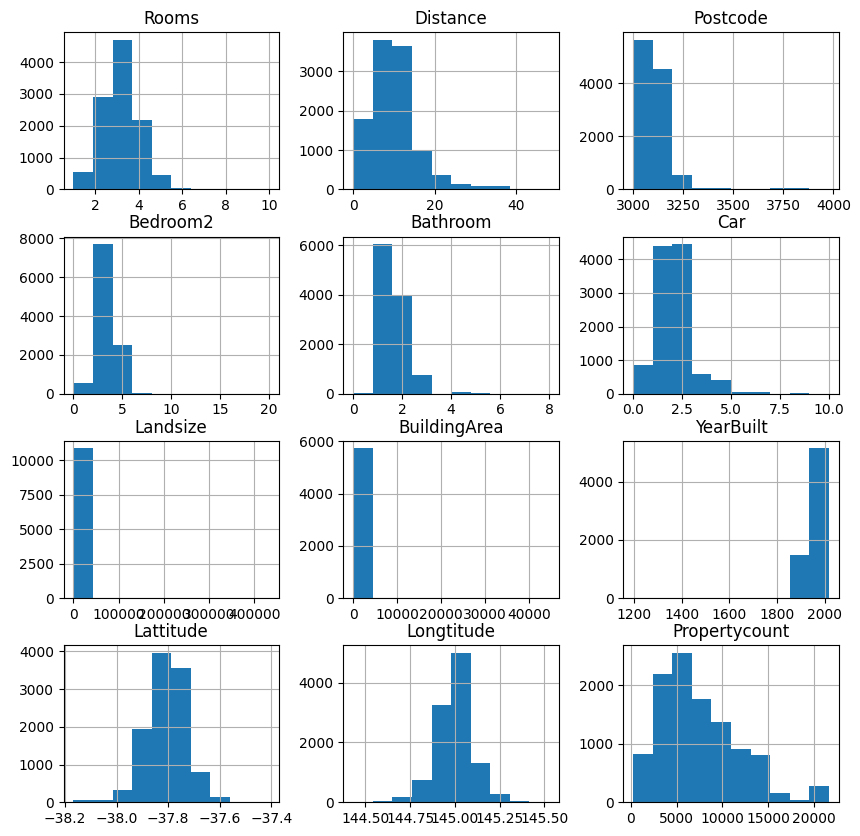

In [ ]:
x_train.hist(figsize=(10,10))

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>]], dtype=object)

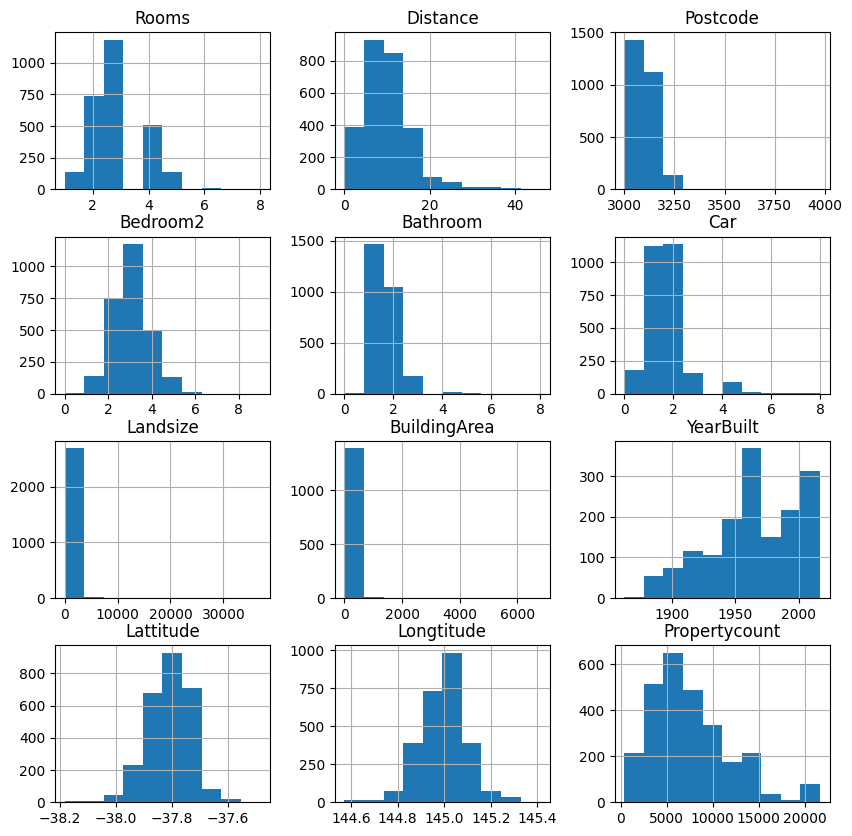

In [ ]:
x_test.hist(figsize=(10,10))

## Предобработка фичей

### Обработка отсутствующих значений

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 11706 to 7671
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10864 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   10864 non-null  float64
 14  YearBuilt      10864 non-null  float64
 15  CouncilArea    10864 non-null  object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regionna

In [ ]:
null_to_median_lst = ['Car', 'BuildingArea', 'YearBuilt']

In [ ]:
for i in null_to_median_lst:
  x_train[i] = x_train[i].fillna(x_train[i].median())

In [ ]:
x_train.CouncilArea = x_train.CouncilArea.fillna(x_train.CouncilArea.value_counts().idxmax())

In [ ]:
x_train.isna().any()

,0
Suburb,False
Address,False
Rooms,False
Type,False
Method,False
SellerG,False
Date,False
Distance,False
Postcode,False
Bedroom2,False


In [ ]:
x_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11706,177,9 Barnet St,3,h,S,Whiting,22/07/2017,16.0,3190.0,3.0,2.0,2.0,725.0,126.00,1970.0,Bayside,-37.95008,145.03203,Southern Metropolitan,4794.0
7528,16,2/16 Argyle St,2,u,SP,hockingstuart,29/04/2017,13.9,3165.0,2.0,1.0,1.0,1026.0,68.11,1970.0,Glen Eira,-37.91100,145.07110,Southern Metropolitan,10969.0
12967,167,28 Supply Dr,3,h,S,hockingstuart,19/08/2017,19.6,3076.0,3.0,1.0,2.0,553.0,126.00,1980.0,Boroondara,-37.65701,145.02621,Northern Metropolitan,10926.0
3388,58,3/16 Elphin St,1,u,SP,Miles,16/04/2016,7.9,3079.0,1.0,1.0,1.0,55.0,126.00,1970.0,Banyule,-37.77720,145.04140,Eastern Metropolitan,5549.0
13007,60,4 Limestone Av,3,h,S,Jellis,19/08/2017,11.7,3033.0,3.0,3.0,2.0,326.0,271.00,2012.0,Boroondara,-37.74009,144.87787,Western Metropolitan,5629.0


### Обработка категориальных признаков

### Вариант 1. Вручную через переназначение с помощью словаря

In [ ]:
d = {v: i+1 for i, v in enumerate(df.Suburb.unique())}

In [ ]:
x_train.Suburb = x_train.Suburb.apply(lambda x: d[x])

### Вариант 2. С помощью LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(x_train.Method)

LabelEncoder()

In [ ]:
le.classes_

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

In [ ]:
x_train.Method = le.transform(x_train.Method)

In [ ]:
x_train.head()

,Suburb,Rooms,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Regionname_Yarra,Regionname_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
748,15,3,1,13.0,3204.0,3.0,2.0,2.0,309.0,126.0,...,False,False,False,False,False,False,False,True,False,False
8193,131,4,1,14.0,3166.0,4.0,2.0,2.0,538.0,126.0,...,False,False,False,False,False,False,False,True,False,False
9874,41,2,1,7.5,3040.0,2.0,1.0,1.0,132.0,126.0,...,False,False,False,False,False,False,False,False,True,False
11558,110,3,3,7.5,3040.0,3.0,2.0,2.0,673.0,136.0,...,False,False,False,False,False,False,False,False,True,False
10582,146,4,1,35.2,3806.0,4.0,5.0,2.0,638.0,352.0,...,False,False,False,True,False,False,False,False,False,False


### Вариант 3. Бинаризация

In [ ]:
x_train = pd.get_dummies(x_train, columns=['Regionname'])

In [ ]:
x_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
10377,184,3/103 Cyprus St,2,u,1,Harcourts,27/05/2017,16.3,3075.0,2.0,...,145.02775,8279.0,False,False,True,False,False,False,False,False
6784,112,2/146 Blyth St,2,u,1,Nelson,16/04/2016,4.5,3057.0,2.0,...,144.97460,5533.0,False,False,True,False,False,False,False,False
2432,41,1/16 Leake St,4,u,3,Barry,19/11/2016,8.0,3040.0,4.0,...,144.91000,9264.0,False,False,False,False,False,False,True,False
11807,93,4/63 Carlisle St,2,u,1,Ray,22/07/2017,5.0,3182.0,2.0,...,144.98337,13240.0,False,False,False,False,False,True,False,False
5665,90,2/234 Domain Rd,4,u,4,RT,18/03/2017,3.3,3141.0,4.0,...,144.98570,14887.0,False,False,False,False,False,True,False,False


In [ ]:
x_train = pd.get_dummies(x_train, columns=['Type'])

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 10377 to 8526
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  int64  
 1   Address                                10864 non-null  object 
 2   Rooms                                  10864 non-null  int64  
 3   Method                                 10864 non-null  int64  
 4   SellerG                                10864 non-null  object 
 5   Date                                   10864 non-null  object 
 6   Distance                               10864 non-null  float64
 7   Postcode                               10864 non-null  float64
 8   Bedroom2                               10864 non-null  float64
 9   Bathroom                               10864 non-null  float64
 10  Car                                    10864 non-null  float64
 11  Land

### Удаление признаков

In [ ]:
lst_to_drop = ['Address', 'SellerG', 'Date', 'CouncilArea']

In [ ]:
x_train = x_train.drop(lst_to_drop, axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 5812 to 4159
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  int64  
 1   Rooms                                  10864 non-null  int64  
 2   Method                                 10864 non-null  int64  
 3   Distance                               10864 non-null  float64
 4   Postcode                               10864 non-null  float64
 5   Bedroom2                               10864 non-null  float64
 6   Bathroom                               10864 non-null  float64
 7   Car                                    10864 non-null  float64
 8   Landsize                               10864 non-null  float64
 9   BuildingArea                           10864 non-null  float64
 10  YearBuilt                              10864 non-null  float64
 11  Latti

## Обучение моделей

### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 5812 to 4159
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  int64  
 1   Rooms                                  10864 non-null  int64  
 2   Method                                 10864 non-null  int64  
 3   Distance                               10864 non-null  float64
 4   Postcode                               10864 non-null  float64
 5   Bedroom2                               10864 non-null  float64
 6   Bathroom                               10864 non-null  float64
 7   Car                                    10864 non-null  float64
 8   Landsize                               10864 non-null  float64
 9   BuildingArea                           10864 non-null  float64
 10  YearBuilt                              10864 non-null  float64
 11  Latti

## Подготовка тестовых данных

In [ ]:
x_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2343,Essendon,33 Bradshaw St,3,h,VB,Barry,3/12/2016,8.0,3040.0,3.0,1.0,1.0,445.0,NaN,NaN,Moonee Valley,-37.75050,144.89340,Western Metropolitan,9264.0
13441,Greensborough,9 Tangari Ct,3,h,S,Parkes,26/08/2017,16.1,3088.0,3.0,2.0,2.0,873.0,NaN,1985.0,NaN,-37.69324,145.10230,Northern Metropolitan,8524.0
11580,Aspendale Gardens,12 Pacific Dr,4,h,VB,Barry,22/07/2017,21.5,3195.0,4.0,2.0,2.0,383.0,NaN,NaN,Kingston,-38.01958,145.12356,South-Eastern Metropolitan,2243.0
11801,South Yarra,10/391 Toorak Rd,2,u,S,Marshall,22/07/2017,2.7,3141.0,2.0,2.0,2.0,0.0,133.0,1995.0,Stonnington,-37.84018,145.00265,Southern Metropolitan,14887.0
7746,Coburg,65 Victoria St,2,h,S,Raine,6/05/2017,7.8,3058.0,2.0,1.0,0.0,275.0,106.2,1920.0,Moreland,-37.74240,144.95760,Northern Metropolitan,11204.0


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 2343 to 2319
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         2716 non-null   object 
 1   Address        2716 non-null   object 
 2   Rooms          2716 non-null   int64  
 3   Type           2716 non-null   object 
 4   Method         2716 non-null   object 
 5   SellerG        2716 non-null   object 
 6   Date           2716 non-null   object 
 7   Distance       2716 non-null   float64
 8   Postcode       2716 non-null   float64
 9   Bedroom2       2716 non-null   float64
 10  Bathroom       2716 non-null   float64
 11  Car            2698 non-null   float64
 12  Landsize       2716 non-null   float64
 13  BuildingArea   1399 non-null   float64
 14  YearBuilt      1602 non-null   float64
 15  CouncilArea    2425 non-null   object 
 16  Lattitude      2716 non-null   float64
 17  Longtitude     2716 non-null   float64
 18  Regionname

In [ ]:
for i in null_to_median_lst:
  x_test[i] = x_test[i].fillna(x_train[i].median())

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 2343 to 2319
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 2716 non-null   int64  
 1   Rooms                                  2716 non-null   int64  
 2   Method                                 2716 non-null   int64  
 3   Distance                               2716 non-null   float64
 4   Postcode                               2716 non-null   float64
 5   Bedroom2                               2716 non-null   float64
 6   Bathroom                               2716 non-null   float64
 7   Car                                    2716 non-null   float64
 8   Landsize                               2716 non-null   float64
 9   BuildingArea                           2716 non-null   float64
 10  YearBuilt                              2716 non-null   float64
 11  Lattit

In [ ]:
x_test.Suburb = x_test.Suburb.apply(lambda x: d[x])

In [ ]:
x_test.Method = le.transform(x_test.Method)

In [ ]:
x_test = pd.get_dummies(x_test, columns=['Regionname', 'Type'])

In [ ]:
x_test = x_test.drop(lst_to_drop, axis=1)

In [ ]:
x_test.head()

,Suburb,Rooms,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
2343,41,3,4,8.0,3040.0,3.0,1.0,1.0,445.0,NaN,NaN,-37.75050,144.89340,9264.0,False,False,False,False,False,False,True,False,True,False,False
13441,174,3,1,16.1,3088.0,3.0,2.0,2.0,873.0,NaN,1985.0,-37.69324,145.10230,8524.0,False,False,True,False,False,False,False,False,True,False,False
11580,291,4,4,21.5,3195.0,4.0,2.0,2.0,383.0,NaN,NaN,-38.01958,145.12356,2243.0,False,False,False,False,True,False,False,False,True,False,False
11801,90,2,1,2.7,3141.0,2.0,2.0,2.0,0.0,133.0,1995.0,-37.84018,145.00265,14887.0,False,False,False,False,False,True,False,False,False,False,True
7746,34,2,1,7.8,3058.0,2.0,1.0,0.0,275.0,106.2,1920.0,-37.74240,144.95760,11204.0,False,False,True,False,False,False,False,False,True,False,False


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716 entries, 2343 to 2319
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 2716 non-null   int64  
 1   Rooms                                  2716 non-null   int64  
 2   Method                                 2716 non-null   int64  
 3   Distance                               2716 non-null   float64
 4   Postcode                               2716 non-null   float64
 5   Bedroom2                               2716 non-null   float64
 6   Bathroom                               2716 non-null   float64
 7   Car                                    2716 non-null   float64
 8   Landsize                               2716 non-null   float64
 9   BuildingArea                           2716 non-null   float64
 10  YearBuilt                              2716 non-null   float64
 11  Lattit

## Прогноз на тестовой выборке

In [ ]:
y_test_predict_lr = lr.predict(x_test)

In [ ]:
y_test_predict_rf = rf.predict(x_test)

In [ ]:
y_test_predict_lr[:10]

array([ 907647.57484424,  835363.13912334, 1234738.7355839 ,
       1151098.43774991,  847029.85016526, 1442569.00126494,
        757917.86758243, 1607088.38878803, 1363515.55717818,
        832098.73155522])

In [ ]:
len(y_test_predict_lr)

2716

In [ ]:
y_test_predict_rf[:10]

array([1130587.0325318 ,  910496.33981456, 1039441.69028275,
       1057836.68689076,  938439.81256857, 1270963.72004951,
        947803.14308695, 1636169.02223799, 1310902.45767718,
        980550.09445714])

In [ ]:
np.array(y_test[:10])

array([ 980000.,  842000.,  840000., 1340000.,  930000., 1201000.,
        680000., 1375000., 1327500., 1305000.])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, y_test_predict_lr)

266769.29562711617

In [ ]:
mean_absolute_error(y_test, y_test_predict_rf)

195146.11905031913

In [ ]:
mean_squared_error(y_test, y_test_predict_lr)

149168914669.20633

In [ ]:
mean_squared_error(y_test, y_test_predict_rf)

94098692074.76826